In [29]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt


In [30]:
# Load the CSV into dataframe
advertising_df = pd.read_csv(os.path.join("Data", "Clean_Advertising_Data_v3.csv"))
advertising_df.head()

,date,country,region,operator,channel,pod_fill_rate,endpoint_requests,bid_requests,bid_responses,bid_wons,impressions,revenue,CPM,requested_pod_duration,requested_pod_droprate,filled_pod_duration,filled_pod_droprate,delivered_pod_duration
0,2022-02-28,United Kingdom,Europe,Op_003,Channel_003,0.03,14,1818,1102,132,5,0.11,22.0,122.0,-0.024016,119.07,-0.966406,4.00
1,2022-02-28,Spain,Europe,Op_003,Channel_003,0.02,82,11312,506,162,8,0.14,17.5,244.0,-0.671311,80.20,-0.950125,4.00
2,2022-02-28,France,Europe,Op_003,Channel_003,0.03,19,2621,132,33,2,0.02,10.0,122.0,-0.677705,39.32,-0.919634,3.16
3,2022-02-28,Italy,Europe,Op_003,Channel_003,0.02,14,1932,83,47,1,0.01,10.0,122.0,-0.297459,85.71,-0.975032,2.14
4,2022-02-28,Germany,Europe,Op_003,Channel_003,0.00,1,139,13,5,0,0.00,0.0,122.0,0.000000,122.00,-1.000000,0.00


In [31]:
# Check value types
advertising_df.dtypes

date                       object
country                    object
region                     object
operator                   object
channel                    object
pod_fill_rate             float64
endpoint_requests           int64
bid_requests                int64
bid_responses               int64
bid_wons                    int64
impressions                 int64
revenue                   float64
CPM                       float64
requested_pod_duration    float64
requested_pod_droprate    float64
filled_pod_duration       float64
filled_pod_droprate       float64
delivered_pod_duration    float64
dtype: object

In [32]:
# Convert [date] column to datetime
advertising_df['date'] = pd.to_datetime(advertising_df['date'], dayfirst=True, errors='raise')

In [33]:
# Sort the dataframe by date
advertising_df.sort_values(by='date', inplace=True)
advertising_df.head()

,date,country,region,operator,channel,pod_fill_rate,endpoint_requests,bid_requests,bid_responses,bid_wons,impressions,revenue,CPM,requested_pod_duration,requested_pod_droprate,filled_pod_duration,filled_pod_droprate,delivered_pod_duration
22781,2022-01-01,India,Asia,Op_002,Channel_001,0.01,1406,73870,574,110,72,0.27,3.75,89.36,-0.983885,1.44,-0.340278,0.95
4366,2022-01-01,Sierra Leone,Africa,Op_002,Channel_003,0.00,3,216,0,0,0,0.00,0.00,366.00,-1.000000,0.00,NaN,0.00
4365,2022-01-01,Morocco,Africa,Op_002,Channel_003,0.00,2,54,0,0,0,0.00,0.00,46.00,-1.000000,0.00,NaN,0.00
4364,2022-01-01,Denmark,Europe,Op_002,Channel_003,0.00,1,33,0,0,0,0.00,0.00,60.00,-1.000000,0.00,NaN,0.00
4363,2022-01-01,Ireland,Europe,Op_002,Channel_003,0.00,3,99,0,0,0,0.00,0.00,183.00,-1.000000,0.00,NaN,0.00


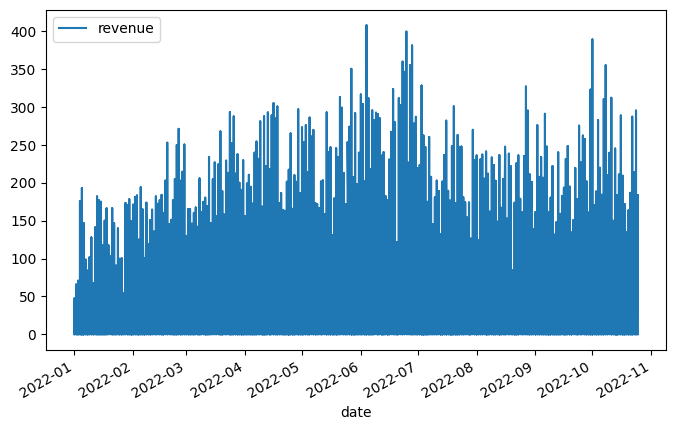

In [34]:
# Plot revenue by date
advertising_df.plot(x="date", y="revenue")
plt.show()

In [35]:
# Plot revenue grouped by day
revenue_by_day = advertising_df.groupby(['date']).sum()['revenue']
revenue_by_day

date
2022-01-01     222.12
2022-01-02     322.10
2022-01-03     346.21
2022-01-04     696.35
2022-01-05     776.13
               ...   
2022-10-21    1066.99
2022-10-22    1287.28
2022-10-23    1404.01
2022-10-24    1104.33
2022-10-25    1028.00
Name: revenue, Length: 298, dtype: float64

In [36]:
# Plot revenue grouped by month
revenue_by_month = advertising_df.groupby(advertising_df.date.dt.month)['revenue'].sum()
revenue_by_month

date
1     16496.75
2     27571.13
3     50471.01
4     50411.84
5     57050.63
6     61468.45
7     47330.89
8     41723.35
9     52842.49
10    38229.40
Name: revenue, dtype: float64

c:\Users\julie\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


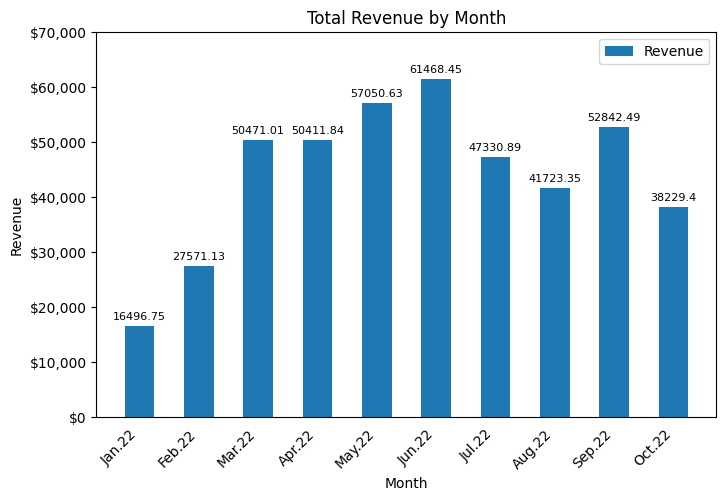

In [37]:
# Set the x-axis to a list of strings for each month.
months = ["Jan.22", "Feb.22", "Mar.22", "Apr.22", "May.22", "Jun.22", "Jul.22", "Aug.22", "Sep.22", "Oct.22"]

# Create the plot
plt.rcParams["figure.figsize"] = (8, 5)
barplot1 = plt.bar(months, revenue_by_month, label='Revenue', width=0.5, tick_label=None)
plt.xticks(rotation=45, horizontalalignment='right')

# Create labels for the x and y axes.
plt.xlabel("Month")
plt.ylabel("Revenue")

# Set the y limit between 0 and 70000
plt.ylim(0, 70000)

# Add value labels
plt.bar_label(barplot1, labels=revenue_by_month, label_type='edge', size=8, padding=3, fmt='${:,.0f}')

# Format the y-axis values
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Remove the xticks
plt.tick_params(bottom = False)

# Create a title.
plt.title("Total Revenue by Month")

# Add the legend.
plt.legend()

In [38]:
# Plot revenue grouped by region
revenue_by_region = advertising_df.groupby(['region']).sum()['revenue']
revenue_by_region

region
Africa                0.21
Asia               6072.53
Europe           412639.66
North America      6144.83
Oceania            9427.21
South America      9311.50
Name: revenue, dtype: float64

c:\Users\julie\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


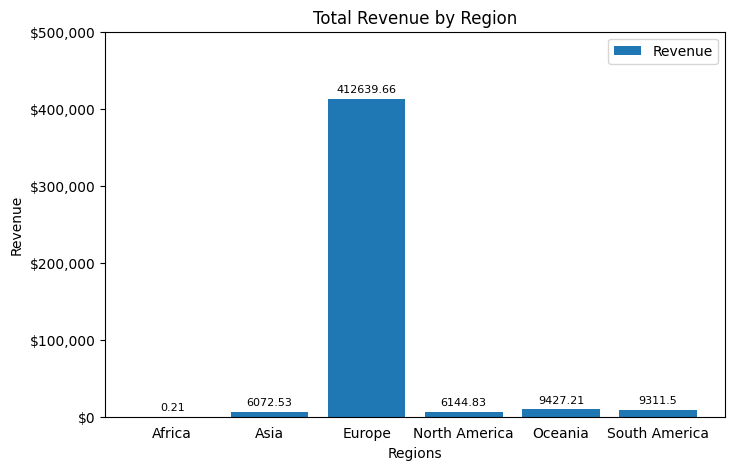

In [39]:

# Set the x-axis to a list of strings for each month.
regions = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]

# Create the plot and add a label for the legend.
plt.rcParams["figure.figsize"] = (8, 5)
barplot2 = plt.bar(regions, revenue_by_region, label='Revenue')

# Create labels for the x and y axes.
plt.xlabel("Regions")
plt.ylabel("Revenue")

# Set the y limit between 0 and 500000
plt.ylim(0, 500000)

# Add value labels
plt.bar_label(barplot2, labels=revenue_by_region, label_type='edge', size=8, padding=3, fmt='${:,.0f}')

# Format the y-axis values
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Remove the xticks
plt.tick_params(bottom = False)

# Create a title.
plt.title("Total Revenue by Region")

# Add the legend.
plt.legend()

In [40]:
# Plot revenue grouped by channel
revenue_by_channel = advertising_df.groupby(['channel']).sum()['revenue']
revenue_by_channel

channel
Channel_001    150925.70
Channel_002    165686.38
Channel_003    124637.89
Unknown          2345.97
Name: revenue, dtype: float64

c:\Users\julie\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


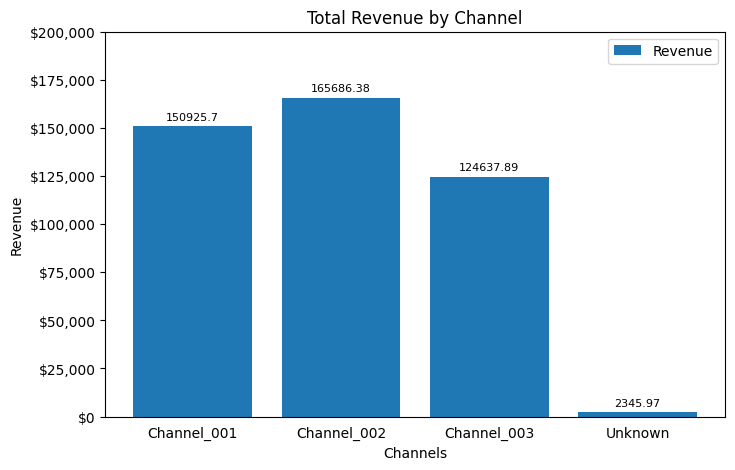

In [41]:
# Set the x-axis to a list of strings for each month.
channels = ["Channel_001", "Channel_002", "Channel_003", "Unknown"]

# Create the plot and add a label for the legend.
plt.rcParams["figure.figsize"] = (8, 5)
barplot3 = plt.bar(channels, revenue_by_channel, label='Revenue')

# Create labels for the x and y axes.
plt.xlabel("Channels")
plt.ylabel("Revenue")

# Set the y limit between 0 and 200000
plt.ylim(0, 200000)

# Add value labels
plt.bar_label(barplot3, labels=revenue_by_channel, label_type='edge', size=8, padding=3, fmt='${:,.0f}')

# Format the y-axis values
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Remove the xticks
plt.tick_params(bottom = False)

# Create a title.
plt.title("Total Revenue by Channel")

# Add the legend.
plt.legend()

In [42]:
# Plot Top10 revenue-generating countries
revenue_by_country = advertising_df.groupby(['country']).sum()['revenue']
revenue_by_country.sort_values(ascending=False)
top10_countries_revenue = revenue_by_country.nlargest(n=10)
top10_countries_pct = top10_countries_revenue.sum() * 100 / advertising_df['revenue'].sum()
print(top10_countries_pct)
top10_countries_revenue

96.54330921062983


country
United Kingdom    134393.10
Germany            99990.20
Italy              51542.70
Spain              45452.79
France             44238.52
Netherlands        20960.16
Australia           9427.21
Brazil              9311.44
Sweden              6875.02
India               6071.06
Name: revenue, dtype: float64

c:\Users\julie\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


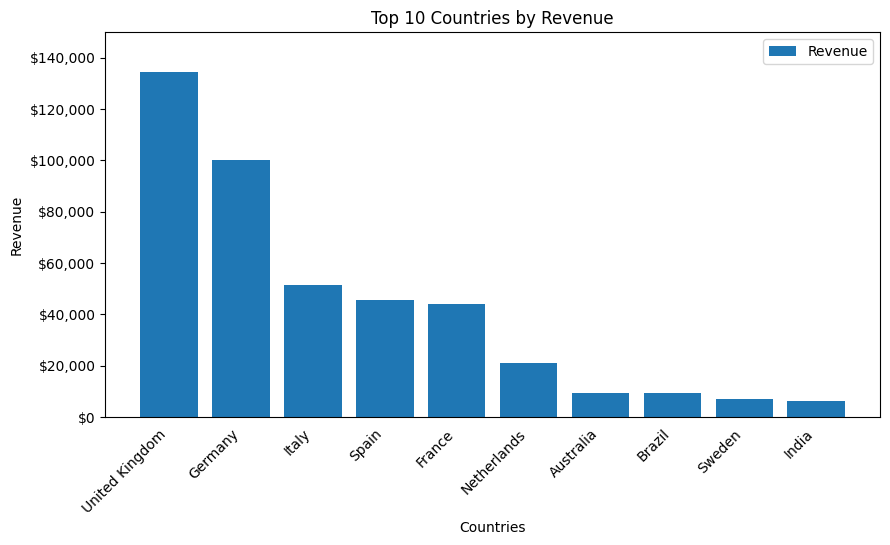

In [43]:
# Set the x-axis to a list of strings for each month.
top10_countries = ["United Kingdom", "Germany", "Italy", "Spain", "France", "Netherlands", "Australia", "Brazil", "Sweden", "India"]

# Create the plot and add a label for the legend.
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(top10_countries, top10_countries_revenue, label='Revenue')
plt.xticks(rotation=45, horizontalalignment='right')

# Create labels for the x and y axes.
plt.xlabel("Countries")
plt.ylabel("Revenue")

# Set the y limit between 0 and 150000
plt.ylim(0, 150000)

# Format the y-axis values
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Remove the xticks
plt.tick_params(bottom = False)

# Create a title.
plt.title("Top 10 Countries by Revenue")

# Add the legend.
plt.legend()

In [44]:
# Top20 revenue-generating countries
top20_countries_revenue = revenue_by_country.nlargest(n=20)
top20_countries_revenue

country
United Kingdom    134393.10
Germany            99990.20
Italy              51542.70
Spain              45452.79
France             44238.52
Netherlands        20960.16
Australia           9427.21
Brazil              9311.44
Sweden              6875.02
India               6071.06
Mexico              5797.56
Switzerland         5339.15
Austria             3249.55
United States        298.55
Portugal             208.41
Finland              168.82
Ireland              141.49
Belgium               72.28
Belize                44.54
Canada                 3.80
Name: revenue, dtype: float64

In [86]:
# Create summary
rest_countries_revenue = advertising_df['revenue'].sum() - top10_countries_revenue.sum()
rest_countries_pct = rest_countries_revenue * 100 / advertising_df['revenue'].sum()
print(f'The top 10 countries generated ${top10_countries_revenue.sum():,.0f} in revenue, or {top10_countries_pct:,.1f}%')
print(f'All other countries combined generated ${rest_countries_revenue:,.0f} in revenue, or {rest_countries_pct:,.1f}%')

The top 10 countries generated $428,262 in revenue, or 96.5%
All other countries combined generated $15,334 in revenue, or 3.5%


In [46]:
# Add "others" category to the top10 plot
advertising_copy_df = advertising_df

def rename_others(country):
    if country not in top10_countries:
        return "Others"
    else:
        return country

advertising_copy_df['country']= advertising_copy_df['country'].apply(rename_others)
advertising_copy_df.head()

,date,country,region,operator,channel,pod_fill_rate,endpoint_requests,bid_requests,bid_responses,bid_wons,impressions,revenue,CPM,requested_pod_duration,requested_pod_droprate,filled_pod_duration,filled_pod_droprate,delivered_pod_duration
22781,2022-01-01,India,Asia,Op_002,Channel_001,0.01,1406,73870,574,110,72,0.27,3.75,89.36,-0.983885,1.44,-0.340278,0.95
4366,2022-01-01,Others,Africa,Op_002,Channel_003,0.00,3,216,0,0,0,0.00,0.00,366.00,-1.000000,0.00,NaN,0.00
4365,2022-01-01,Others,Africa,Op_002,Channel_003,0.00,2,54,0,0,0,0.00,0.00,46.00,-1.000000,0.00,NaN,0.00
4364,2022-01-01,Others,Europe,Op_002,Channel_003,0.00,1,33,0,0,0,0.00,0.00,60.00,-1.000000,0.00,NaN,0.00
4363,2022-01-01,Others,Europe,Op_002,Channel_003,0.00,3,99,0,0,0,0.00,0.00,183.00,-1.000000,0.00,NaN,0.00


In [47]:
advertising_copy_df['country'].nunique

<bound method IndexOpsMixin.nunique of 22781             India
4366             Others
4365             Others
4364             Others
4363             Others
              ...      
14069             Spain
14070    United Kingdom
14071            France
22780             India
41179            Others
Name: country, Length: 41180, dtype: object>

In [48]:
# Create a top 11 list of countries
top11_revenue_by_country = advertising_copy_df.groupby(['country']).sum()['revenue']
top11_revenue_by_country.sort_values(ascending=False)
top11_countries_revenue = top11_revenue_by_country.nlargest(n=11)
top11_countries_revenue

country
United Kingdom    134393.10
Germany            99990.20
Italy              51542.70
Spain              45452.79
France             44238.52
Netherlands        20960.16
Others             15333.74
Australia           9427.21
Brazil              9311.44
Sweden              6875.02
India               6071.06
Name: revenue, dtype: float64

In [49]:
# Reorder to put "others" at the back of the plot
top11_countries_revenue = top11_countries_revenue.reindex(["United Kingdom", "Germany", "Italy", "Spain", "France", "Netherlands", "Australia", "Brazil", "Sweden", "India", "Others"])

c:\Users\julie\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


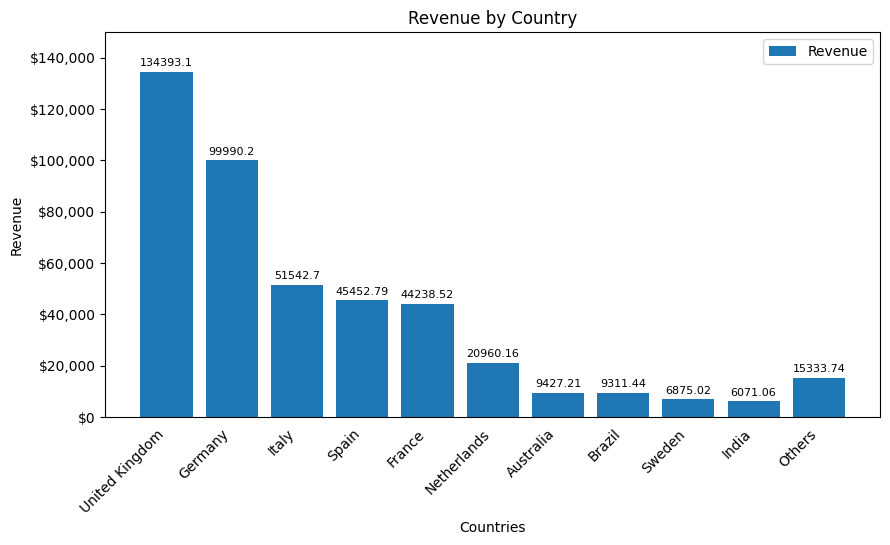

In [50]:
# Plot the top 11
top11_countries = ["United Kingdom", "Germany", "Italy", "Spain", "France", "Netherlands", "Australia", "Brazil", "Sweden", "India", "Others"]

# Create the plot
plt.rcParams["figure.figsize"] = (10, 5)
barplot4 = plt.bar(top11_countries, top11_countries_revenue, label='Revenue')
plt.xticks(rotation=45, horizontalalignment='right')

# Create labels for the x and y axes.
plt.xlabel("Countries")
plt.ylabel("Revenue")

# Format the y-axis values
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

# Set the y limit between 0 and 150000
plt.ylim(0, 150000)

# Remove the xticks
plt.tick_params(bottom = False)

# Add value labels
plt.bar_label(barplot4, labels=top11_countries_revenue, label_type='edge', size=8, padding=3, fmt='${:,.0f}')

# Create a title
plt.title("Revenue by Country")

# Add the legend.
plt.legend()

In [ ]:
# Revenue of channels
# Top 10 revenue-generating countries for Channel_001

In [ ]:
# Revenue of channels
# Top 10 revenue-generating countries for Channel_002

In [ ]:
# Revenue of channels
# Top 10 revenue-generating countries for Channel_003

There are 18386 null values in the impressions column, or 44.6%
count    41180.000000
mean       743.335503
std       2157.538221
min          0.000000
25%          0.000000
50%          4.000000
75%        208.000000
max      44160.000000
Name: impressions, dtype: float64


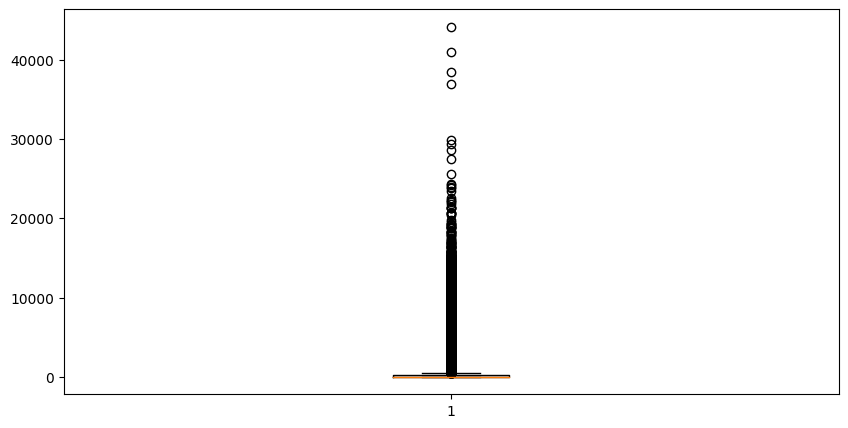

In [80]:
# Stats on the impressions column
rslt_df = advertising_df[advertising_df['impressions'] == 0]
print(f'There are {len(rslt_df)} null values in the impressions column, or {len(rslt_df)*100/len(advertising_df):.1f}%')
print(advertising_df['impressions'].describe())
boxplot1 = plt.boxplot(advertising_df['impressions'])

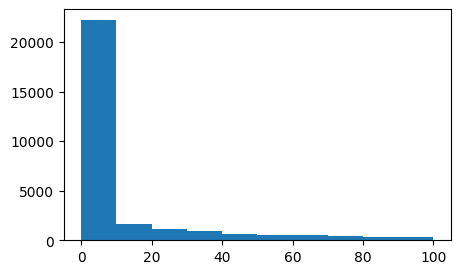

In [62]:
# Plot the distribution of the data for the [impressions] column
fig, ax = plt.subplots(figsize =(5, 3))
hist1 = ax.hist(advertising_df['impressions'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

There are 18396 null values in the revenue column, or 44.7% of values
count    41180.000000
mean        10.772121
std         32.785213
min          0.000000
25%          0.000000
50%          0.060000
75%          2.790000
max        407.850000
Name: revenue, dtype: float64


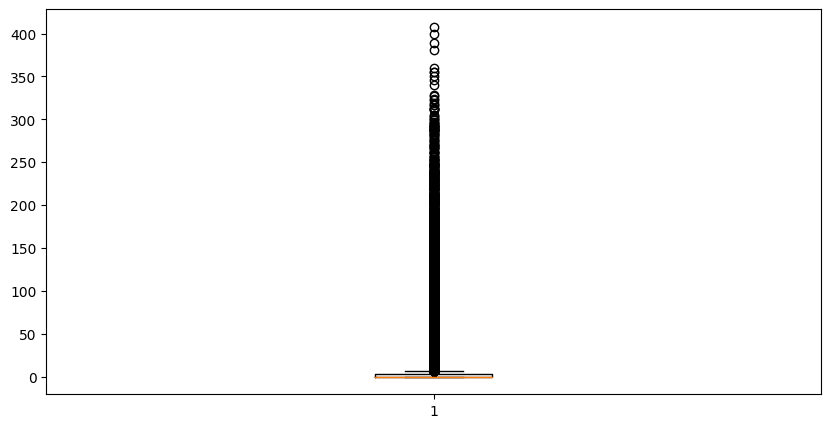

In [87]:
# Stats on the revenue column
rslt2_df = advertising_df[advertising_df['revenue'] == 0]
print(f'There are {len(rslt2_df)} null values in the revenue column, or {len(rslt2_df)*100/len(advertising_df):.1f}% of values')
print(advertising_df['revenue'].describe())
boxplot2 = plt.boxplot(advertising_df['revenue'])

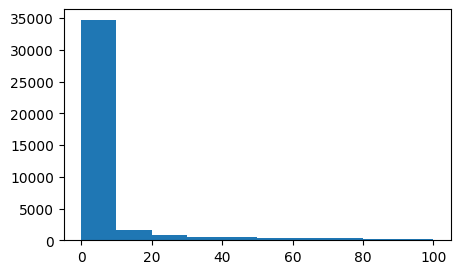

In [63]:
# Plot the distribution of the data for the [revenue] column
fig, ax = plt.subplots(figsize =(5, 3))
hist2 = ax.hist(advertising_df['revenue'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

There are 18396 null values in the CPM column, or 44.7%
count    41180.000000
mean         7.940469
std          8.164261
min          0.000000
25%          0.000000
50%          9.090909
75%         14.444526
max        100.000000
Name: CPM, dtype: float64


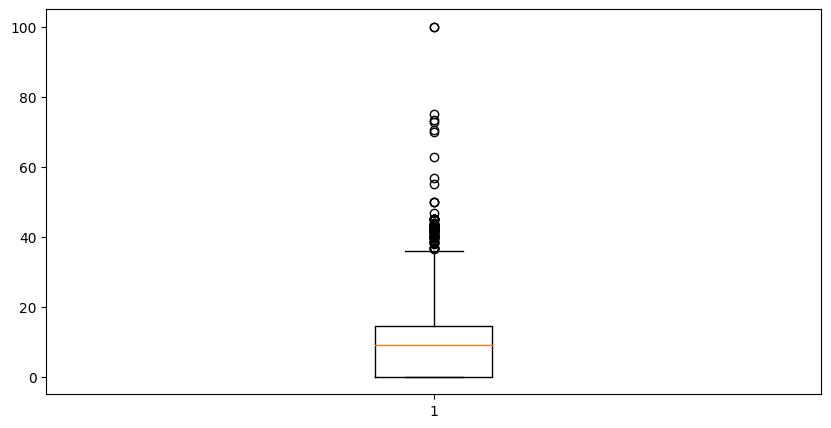

In [83]:
# Stats on the CPM column
rslt3_df = advertising_df[advertising_df['CPM'] == 0]
print(f'There are {len(rslt3_df)} null values in the CPM column, or {len(rslt3_df)*100/len(advertising_df):.1f}%')
print(advertising_df['CPM'].describe())
boxplot3 = plt.boxplot(advertising_df['CPM'])

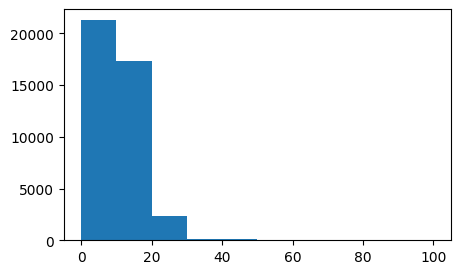

In [64]:
# Plot the distribution of the data for the [CPM] column
fig, ax = plt.subplots(figsize =(5, 3))
hist1 = ax.hist(advertising_df['CPM'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])